In [48]:
using Plots
using HDF5
using Unitful
using UnitfulRecipes
using Statistics

# Load Filter output file

In [104]:
timestamp = "t1" # Edit this value to plot a different time slice from the list above
field = "ps" # Choose from the fields listed above
output_folder = "../results/speedy/myriad/"
unit_comp = 0.01
level = 1

1

In [116]:
filename = joinpath(output_folder,"speedy_boot.h5")
fh = h5open(filename, "r")

println("The following datasets found in file ", filename, ": ", keys(fh))
haskey(fh, "data_syn") && println("The following timestamps found: ", keys(fh["data_syn"]))
haskey(fh["data_syn"], "t0") && println("The following fields found: ", keys(fh["data_syn"]["t0"]))

The following datasets found in file ../results/speedy/myriad/speedy_boot.h5: ["data_avg", "data_syn", "data_var", "grid", "params", "stations", "timer", "weights"]
The following timestamps found: ["t0", "t1", "t10", "t100", "t101", "t102", "t103", "t104", "t105", "t106", "t107", "t108", "t109", "t11", "t110", "t111", "t112", "t113", "t114", "t115", "t116", "t117", "t118", "t119", "t12", "t120", "t13", "t14", "t15", "t16", "t17", "t18", "t19", "t2", "t20", "t21", "t22", "t23", "t24", "t25", "t26", "t27", "t28", "t29", "t3", "t30", "t31", "t32", "t33", "t34", "t35", "t36", "t37", "t38", "t39", "t4", "t40", "t41", "t42", "t43", "t44", "t45", "t46", "t47", "t48", "t49", "t5", "t50", "t51", "t52", "t53", "t54", "t55", "t56", "t57", "t58", "t59", "t6", "t60", "t61", "t62", "t63", "t64", "t65", "t66", "t67", "t68", "t69", "t7", "t70", "t71", "t72", "t73", "t74", "t75", "t76", "t77", "t78", "t79", "t8", "t80", "t81", "t82", "t83", "t84", "t85", "t86", "t87", "t88", "t89", "t9", "t90", "t91", 

# Load Nature Data

In [106]:
filename = "DATA/nature_runs.h5"
th = h5open(filename, "r")

println("The following datasets found in file ", filename, ": ", keys(th))
haskey(th, "data_nature") && println("The following timestamps found: ", keys(th["data_nature"]))
haskey(th["data_nature"], "t1") && println("The following fields found: ", keys(th["data_nature"]["t1"]))

The following datasets found in file DATA/nature_runs.h5: ["data_nature"]
The following timestamps found: ["t0", "t1", "t10", "t100", "t101", "t102", "t103", "t104", "t105", "t106", "t107", "t108", "t109", "t11", "t110", "t111", "t112", "t113", "t114", "t115", "t116", "t117", "t118", "t119", "t12", "t120", "t121", "t122", "t123", "t124", "t125", "t126", "t127", "t128", "t129", "t13", "t130", "t131", "t132", "t133", "t134", "t135", "t136", "t137", "t138", "t139", "t14", "t140", "t141", "t142", "t143", "t144", "t145", "t146", "t147", "t148", "t149", "t15", "t150", "t151", "t152", "t153", "t154", "t155", "t156", "t157", "t158", "t159", "t16", "t160", "t161", "t162", "t163", "t164", "t165", "t166", "t167", "t168", "t169", "t17", "t170", "t171", "t172", "t173", "t174", "t175", "t176", "t177", "t178", "t179", "t18", "t180", "t181", "t182", "t183", "t184", "t185", "t186", "t187", "t188", "t189", "t19", "t190", "t191", "t192", "t193", "t194", "t195", "t196", "t197", "t198", "t199", "t2", "t20"

5", "t226", "t227", "t228", "t229", "t23", "t230", "t231", "t232", "t233", "t234", "t235", "t236", "t237", "t238", "t239", "t24", "t240", "t241", "t25", "t26", "t27", "t28", "t29", "t3", "t30", "t31", "t32", "t33", "t34", "t35", "t36", "t37", "t38", "t39", "t4", "t40", "t41", "t42", "t43", "t44", "t45", "t46", "t47", "t48", "t49", "t5", "t50", "t51", "t52", "t53", "t54", "t55", "t56", "t57", "t58", "t59", "t6", "t60", "t61", "t62", "t63", "t64", "t65", "t66", "t67", "t68", "t69", "t7", "t70", "t71", "t72", "t73", "t74", "t75", "t76", "t77", "t78", "t79", "t8", "t80", "t81", "t82", "t83", "t84", "t85", "t86", "t87", "t88", "t89", "t9", "t90", "t91", "t92", "t93", "t94", "t95", "t96", "t97", "t98", "t99"]
The following fields found: ["T", "ps", "q", "rain", "u", "v"]


# Collect data from the files

In [117]:
field_unit = read(fh["data_syn"][timestamp][field]["Unit"])
var_unit = read(fh["data_var"][timestamp][field]["Unit"])
x_unit = read(fh["grid"]["x"]["Unit"])
y_unit = read(fh["grid"]["y"]["Unit"])
x_st_unit = read(fh["stations"]["x"]["Unit"])
y_st_unit = read(fh["stations"]["y"]["Unit"])

field_desc = read(fh["data_syn"][timestamp][field]["Description"])

x = read(fh["grid"]["x"]) .* uparse(x_unit) .|> u"°"
y = read(fh["grid"]["y"]) .* uparse(y_unit) .|> u"°"
z_t = read(fh["data_syn"][timestamp][field]) .* uparse(field_unit)
z_avg = read(fh["data_avg"][timestamp][field]) .* uparse(field_unit)
z_var = read(fh["data_var"][timestamp][field]) .* uparse(var_unit)
z_std = sqrt.(z_var)
x_st = read(fh["stations"]["x"]) .* uparse(x_st_unit) .|> u"°"
y_st = read(fh["stations"]["y"]) .* uparse(y_st_unit) .|> u"°"

50-element Vector{Quantity{Float64, NoDims, Unitful.FreeUnits{(°,), NoDims, nothing}}}:
                 0.0°
 0.20052719065466762°
 0.33421198442444605°
  0.5347391750791137°
  0.5347391750791137°
  0.6684239688488921°
  0.6684239688488921°
  0.6684239688488921°
  0.8689511595035598°
  0.8689511595035598°
                    ⋮
  2.2726414940862334°
  2.2726414940862334°
   2.473168684740901°
   2.473168684740901°
   2.473168684740901°
   2.606853478510679°
   2.606853478510679°
   2.807380669165347°
  2.9410654629351254°

In [108]:
field_unit = read(th["data_nature"][timestamp][field]["Unit"])
field_desc = read(th["data_nature"][timestamp][field]["Description"])
z_truth = read(th["data_nature"][timestamp][field]) .* uparse(field_unit);


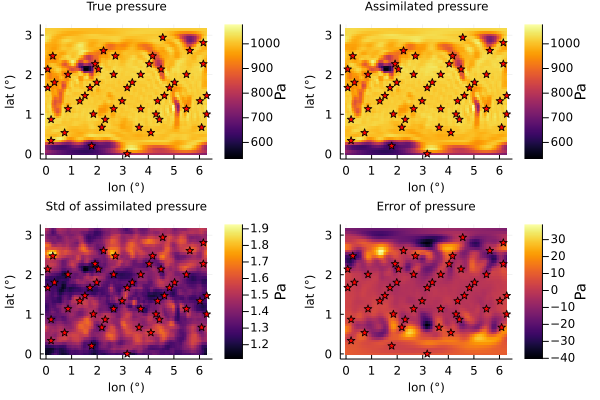

In [118]:
function plot_tdata(x, y, z_t, z_avg, z_std, field_desc)
    n_contours = 100
    zmax = max(maximum(z_t), maximum(z_avg))
    zmin = min(minimum(z_t), minimum(z_avg))
    levels = range(zmin, zmax; length=n_contours)
    z_err = z_t-z_avg
    p1 = heatmap(x, y, transpose(z_t); title="True $(lowercase(field_desc))")
    p2 = heatmap(x, y, transpose(z_avg); title="Assimilated $(lowercase(field_desc))")
    p3 = heatmap(x, y, transpose(z_std); title="Std of assimilated $(lowercase(field_desc))")
    p4 = heatmap(x, y, transpose(z_err); title="Error of $(lowercase(field_desc))")
    for (i, plt) in enumerate((p1, p2, p3, p4))
        # Set labels
        plot!(plt; xlabel="lon", ylabel="lat")
        # Set range of color bar for first two plots
        i ∈ (1, 2) && plot!(plt; clims=(ustrip(zmin), ustrip(zmax)))
        # Add the positions of the stations
        scatter!(plt, x_st, y_st, color=:red, marker=:star, label="")
    end

    plot(p1, p2, p3, p4; titlefontsize=8, guidefontsize=8)
end

plot_tdata(x, y, z_t[:,:,level]*unit_comp, z_avg[:,:,level]*unit_comp, z_std[:,:,level]*unit_comp, field_desc)
# savefig("../results/speedy/testing/Obs.png")

In [124]:
animation = @animate for timestamp ∈ keys(fh["data_syn"])
    z_truth = read(th["data_nature"][timestamp][field]) .* uparse(field_unit)
    z_avg = read(fh["data_avg"][timestamp][field]) .* uparse(field_unit)
    z_var = read(fh["data_var"][timestamp][field]) .* uparse(var_unit)
    z_std = sqrt.(z_var)

    plot_tdata(x, y, z_truth[:,:,level]*unit_comp, z_avg[:,:,level]*unit_comp, z_std[:,:,level]*unit_comp, field_desc)
end

mp4(animation, joinpath(output_folder,string(field,".mp4")); fps=2)

┌ Info: Saved animation to 
│   fn = /Users/dangiles/.julia/dev/ParticleDA/results/speedy/myriad/ps.mp4
└ @ Plots /Users/dangiles/.julia/packages/Plots/PomtQ/src/animation.jl:114


Plots.AnimatedGif("/Users/dangiles/.julia/dev/ParticleDA/results/speedy/myriad/ps.mp4")

# Time Series of RMSE

In [123]:

rmse = Float64[].* uparse(field_unit)
for it = 0:length(keys(fh["data_syn"]))-1
    timestamp = "t" * string(it)
    z_truth = read(th["data_nature"][timestamp][field]) .* uparse(field_unit)
    z_avg = read(fh["data_avg"][timestamp][field]) .* uparse(field_unit)
    error = sqrt.(mean((z_truth[:,:,level].-z_avg[:,:,level]).^2))
    push!(rmse, error)
end
@show rmse

plot(rmse*unit_comp, label="", marker=:o, xlabel="Time step", ylabel="RMSE", title=string(field, "(level = ", level,")"))
savefig(joinpath(output_folder,string(field,"_rmse.png")))


rmse = Quantity{Float64, 𝐌 𝐋⁻¹ 𝐓⁻², Unitful.FreeUnits{(Pa,), 𝐌 𝐋⁻¹ 𝐓⁻², nothing}}[1173.1959642581555 Pa, 1186.9082805806543 Pa, 1191.4327290462365 Pa, 1181.0547438821443 Pa, 1173.329854633061 Pa, 1168.8843597725354 Pa, 1158.3297002586553 Pa, 1144.829041366819 Pa, 1121.63077074981 Pa, 1123.8181197054414 Pa, 1119.3783388401505 Pa, 1127.3426622867053 Pa, 1135.5093252041956 Pa, 1155.0029253098076 Pa, 1178.728460908289 Pa, 1205.779073505253 Pa, 1211.7373802669763 Pa, 1215.5528045948356 Pa, 1212.3506310866064 Pa, 1222.1844724292268 Pa, 1213.4651809118059 Pa, 1214.9842573698984 Pa, 1217.9312915889095 Pa, 1229.7414160359735 Pa, 1228.4600549751035 Pa, 1266.7800006944667 Pa, 1271.1066186187024 Pa, 1283.674459483684 Pa, 1283.9400218897458 Pa, 1268.8429348321265 Pa, 1242.3036213298108 Pa, 1190.2336042689344 Pa, 1168.2174659276998 Pa, 1131.63234344922 Pa, 1140.1951743729837 Pa, 1098.1188448616851 Pa, 1129.657696549196 Pa, 1131.5648552482498 Pa, 1165.76596235595 Pa, 1167.1078350416892 Pa, 1190.75332

# Spatial RMSE

In [121]:
error = zeros(96,48, length(keys(fh["data_syn"]))).* uparse(field_unit)

for it = 0:length(keys(fh["data_syn"]))-1
    timestamp = "t" * string(it)
    z_truth = read(th["data_nature"][timestamp][field]) .* uparse(field_unit)
    z_avg = read(fh["data_avg"][timestamp][field]) .* uparse(field_unit)
    @view(error[:,:,it+1]) .= sqrt.((@view(z_truth[:,:,level]) - @view(z_avg[:,:,level])).^2)
end
error = error*unit_comp
rmse = mean(error, dims=3)

function plot_rmsedata(x, y, rmse, field_desc)
    n_contours = 100
    zmax = maximum(rmse)
    zmin = minimum(rmse)
    levels = range(zmin, zmax; length=n_contours)
    
    p1 = heatmap(x, y, transpose(rmse); title="Time Mean RMSE $(lowercase(field_desc))")
    plot!(p1; xlabel="lon", ylabel="lat")
    plot!(p1; clims=(ustrip(zmin), ustrip(zmax)))

    scatter!(p1, x_st, y_st, color=:red, marker=:star, label="")


    plot(p1; titlefontsize=8, guidefontsize=8)
end

plot_rmsedata(x, y, rmse[:,:,1], field_desc)

savefig(joinpath(output_folder,"Time-mean_RMSE.png"))

In [122]:
plot([1 / sum(read(w) .^ 2) for w in fh["weights"]];
     label="", marker=:o, xlabel="Time step", ylabel="Estimated Sample Size (1 / sum(weight^2))")
savefig(joinpath(output_folder,"weights.png"))